In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [33]:
df = pd.read_csv('car data.csv')

In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
df.shape

(301, 9)

In [36]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [37]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [40]:
df.drop(['Car_Name'],axis = 1,inplace = True)

In [41]:
df['Current Year'] = 2020

In [42]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [43]:
df['No_Year'] = df['Current Year']-df['Year']

In [44]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [45]:
df.drop(['Year'],axis=1,inplace=True)

In [46]:
df=pd.get_dummies(df,drop_first=True)

In [47]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [48]:
df=df.drop(['Current Year'],axis=1)

Text(0.5, 1.0, 'Heatmap of all features')

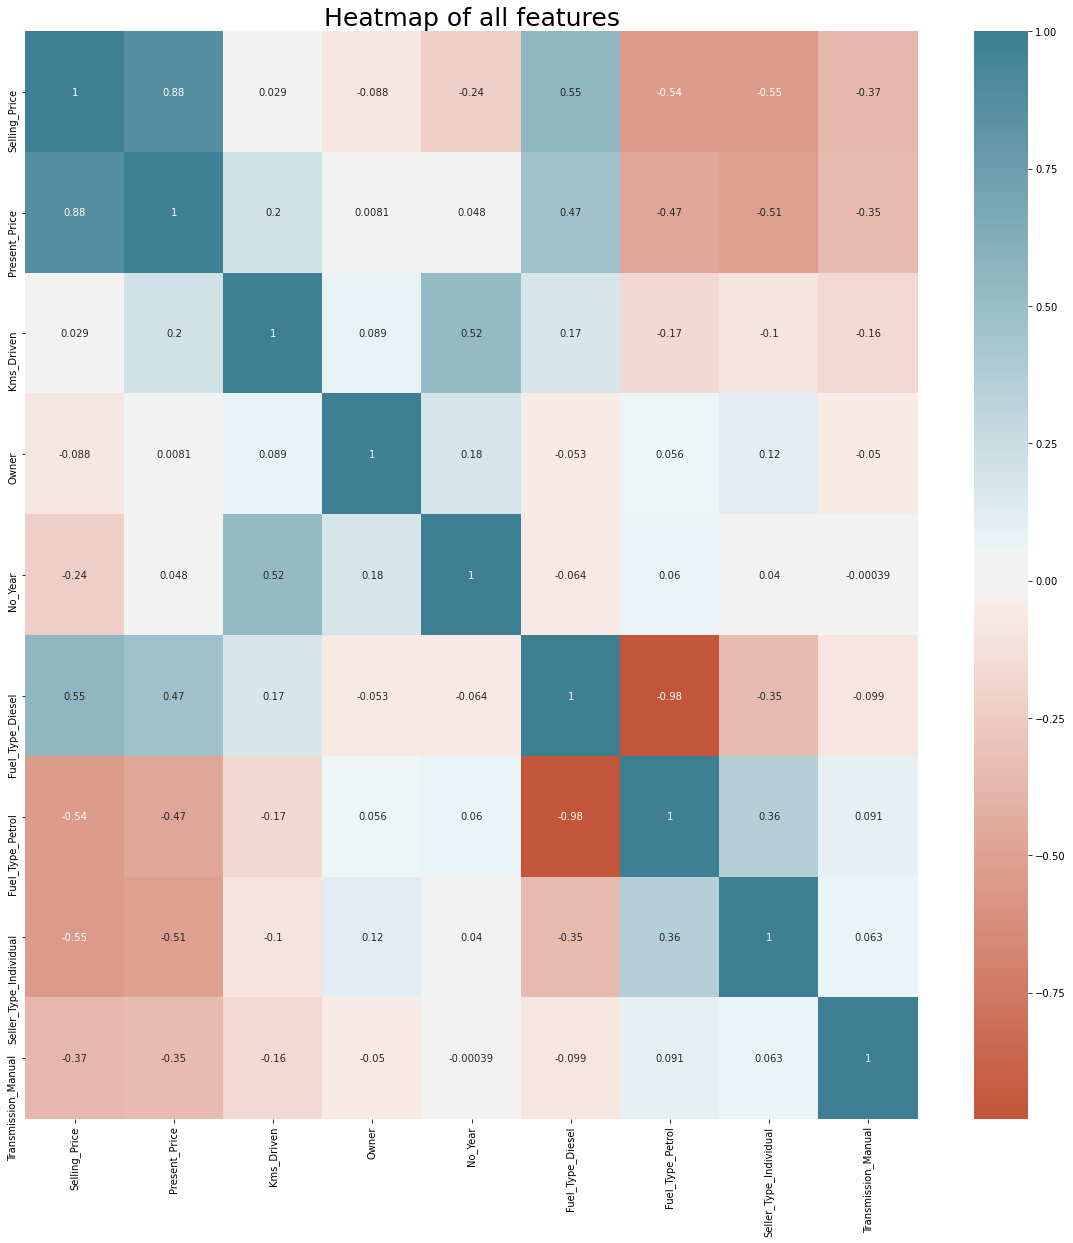

In [83]:
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=200),annot=True)
plt.title('Heatmap of all features',fontsize=25)

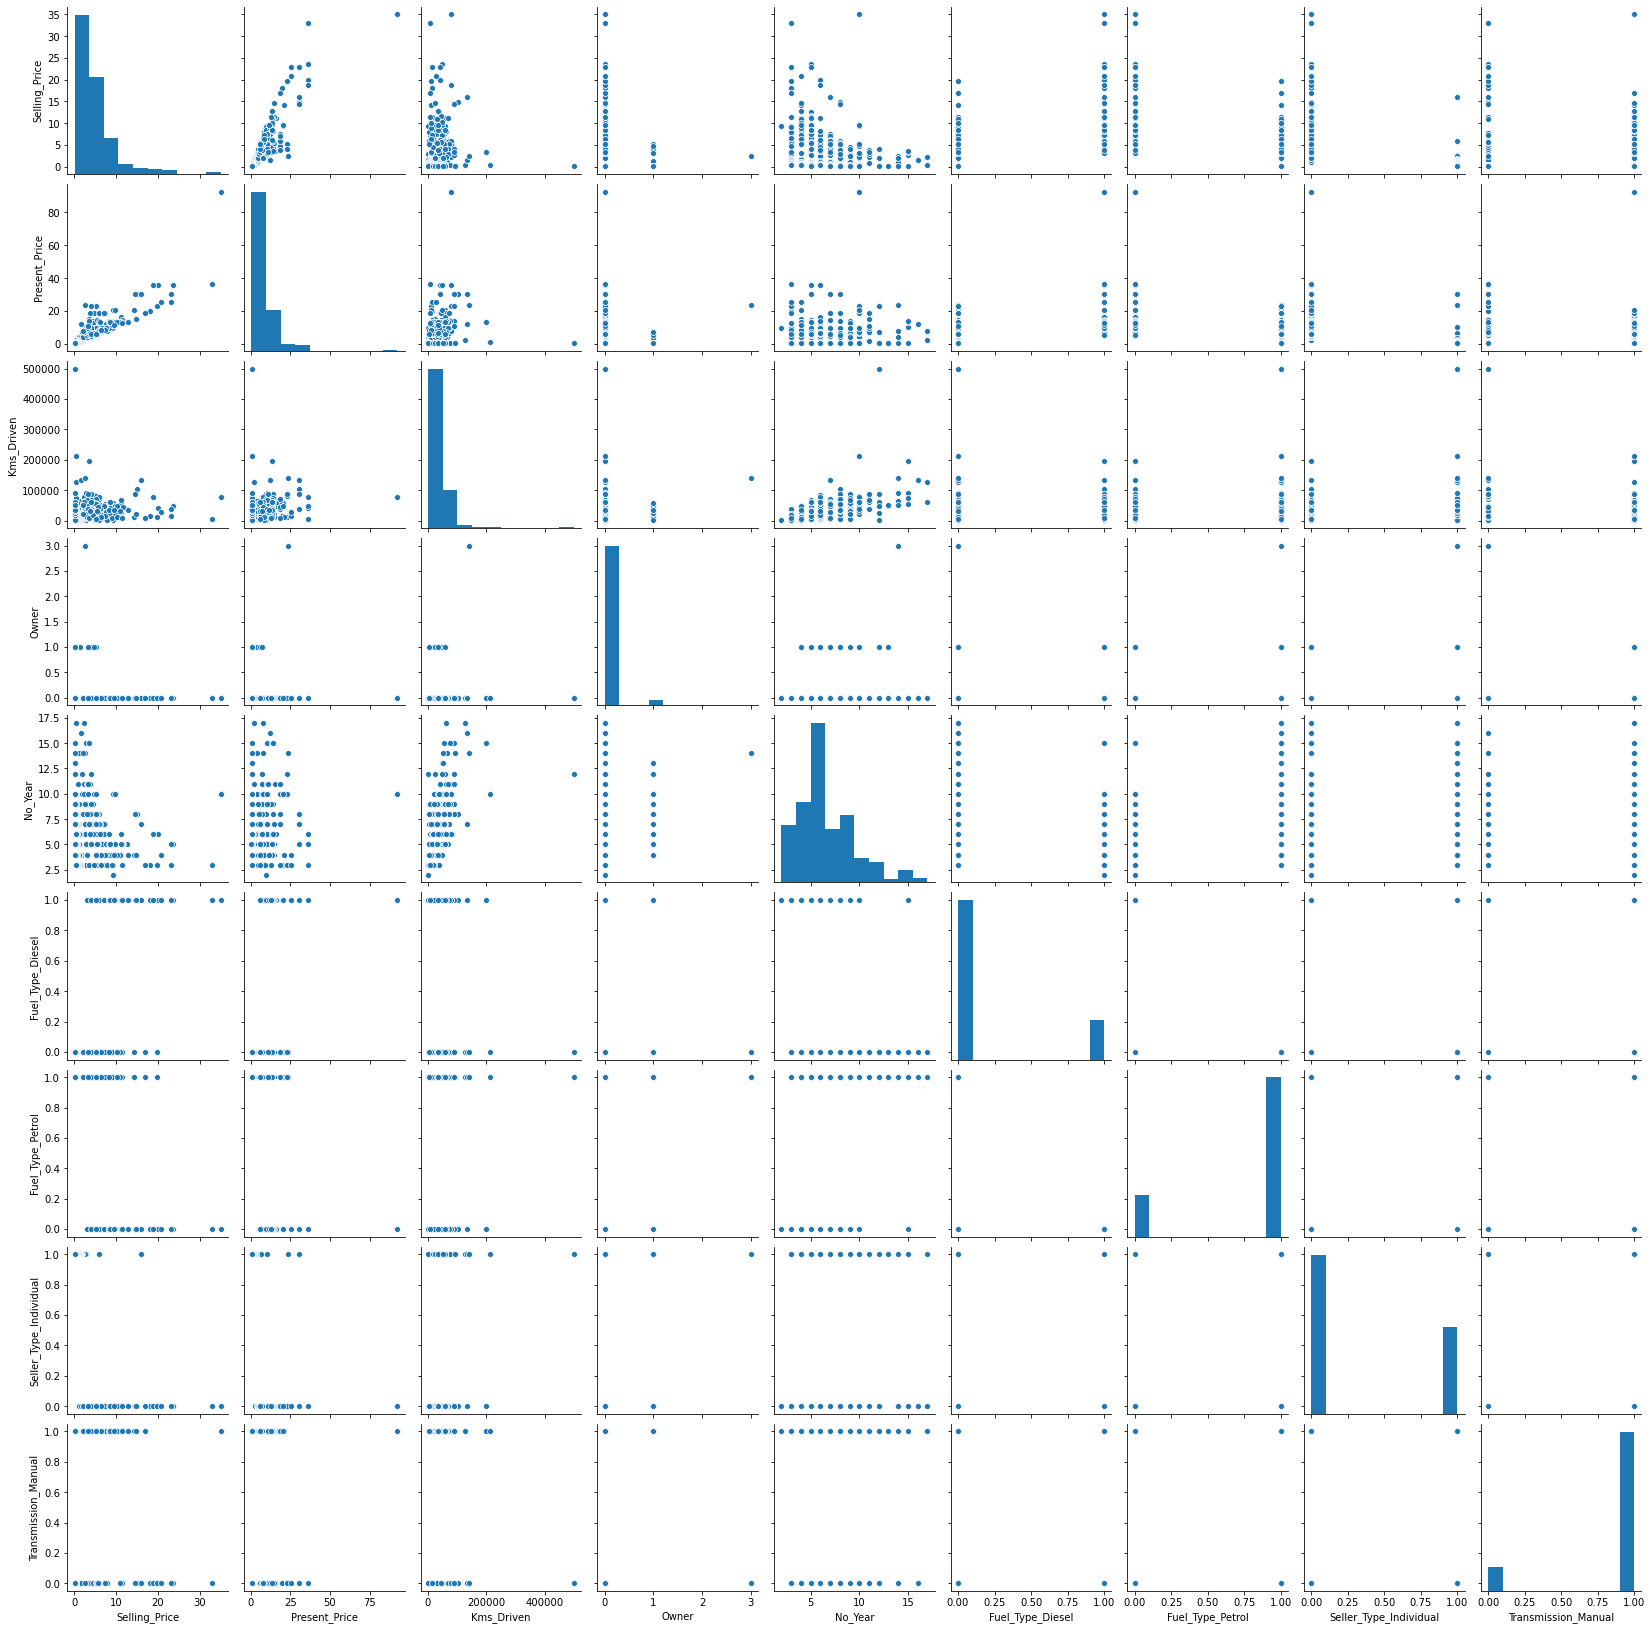

In [51]:
sns.pairplot(df)

In [53]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [56]:
print(model.feature_importances_)

[0.34625057 0.04392347 0.00134896 0.07507714 0.23647198 0.01140553
 0.1385717  0.14695065]


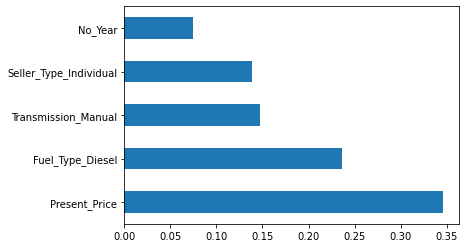

In [60]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
regressor=RandomForestRegressor()

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', ' sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', ' sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
rf = RandomForestRegressor()

In [70]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features= sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=1100, min_samples_spl

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features= sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', ' sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [73]:
rf_random.best_score_

-4.364950847353279

In [84]:
y_pred=rf_random.predict(X_test)

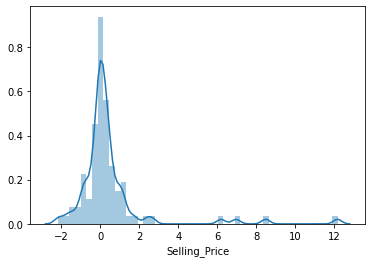

In [86]:
sns.distplot(y_test-y_pred)

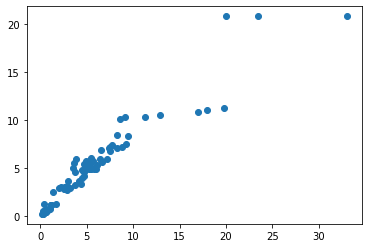

In [88]:
plt.scatter(y_test,y_pred)

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8882605348422306
MSE: 3.959996925424004
RMSE: 1.9899741016968044


In [79]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)